In [13]:
# Imports and inputs
from pyhdf.SD import SD, SDC
import matplotlib.pyplot as plt
import numpy as np

hdfFile = r'C:\Users\alam\Desktop\EOIRData\MOD11A2.A2022177.h09v06.061.2022186044223.hdf'
outputFile = r'C:\Users\alam\Desktop\EOIRData\LSTData.csv'

In [6]:
# Load file
hdf = SD(hdfFile, SDC.READ)

# Print attributes to find GRingPointLongitude and GRingPointLatitude to find corner points
print(hdf.attributes())

# Print datasets to find our desired data name
print(hdf.datasets())

{'HDFEOSVersion': 'HDFEOS_V2.19', 'StructMetadata.0': 'GROUP=SwathStructure\nEND_GROUP=SwathStructure\nGROUP=GridStructure\n\tGROUP=GRID_1\n\t\tGridName="MODIS_Grid_8Day_1km_LST"\n\t\tXDim=1200\n\t\tYDim=1200\n\t\tUpperLeftPointMtrs=(-10007554.677899,3335851.559300)\n\t\tLowerRightMtrs=(-8895604.158132,2223901.039533)\n\t\tProjection=GCTP_SNSOID\n\t\tProjParams=(6371007.181000,0,0,0,0,0,0,0,86400,0,0,0,0)\n\t\tSphereCode=-1\n\t\tGridOrigin=HDFE_GD_UL\n\t\tGROUP=Dimension\n\t\tEND_GROUP=Dimension\n\t\tGROUP=DataField\n\t\t\tOBJECT=DataField_1\n\t\t\t\tDataFieldName="LST_Day_1km"\n\t\t\t\tDataType=DFNT_UINT16\n\t\t\t\tDimList=("YDim","XDim")\n\t\t\tEND_OBJECT=DataField_1\n\t\t\tOBJECT=DataField_2\n\t\t\t\tDataFieldName="QC_Day"\n\t\t\t\tDataType=DFNT_UINT8\n\t\t\t\tDimList=("YDim","XDim")\n\t\t\tEND_OBJECT=DataField_2\n\t\t\tOBJECT=DataField_3\n\t\t\t\tDataFieldName="Day_view_time"\n\t\t\t\tDataType=DFNT_UINT8\n\t\t\t\tDimList=("YDim","XDim")\n\t\t\tEND_OBJECT=DataField_3\n\t\t\tOBJECT=D

In [9]:
# Select desired SDS and get dataset-specific metadata
sds = hdf.select('LST_Night_1km')
print(sds.attributes())

{'long_name': '8-day nighttime 1km grid Land-surface Temperature', 'units': 'K', 'Number Type': 'uint16', 'valid_range': [7500, 65535], '_FillValue': 0, 'LST': 'LST data * scale_factor', 'scale_factor': 0.02, 'scale_factor_err': 0.0, 'add_offset': 0.0, 'add_offset_err': 0.0, 'calibrated_nt': 0}


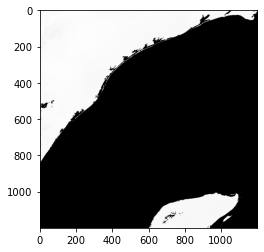

In [17]:
# Get data and apply scaling factor
data = np.array(sds.get()) * 0.02

# Write to csv and show image
np.savetxt(outputFile,data, delimiter=",", fmt="%1g")
plt.imshow(data,cmap='gray')